In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyMAGEMINcalc as MM

MM.__version__

'0.0.6'

In [67]:
comp = {'SiO2_Liq': 44.48,
        'TiO2_Liq': 0.16,
        'Al2O3_Liq': 3.59,
        'FeOt_Liq': 8.10,
        'MgO_Liq': 39.22,
        'CaO_Liq': 3.44,
        'Na2O_Liq': 0.30,
        'K2O_Liq': 0.02,
        'Cr2O3_Liq': 0.42,
        'H2O_Liq': 0.00,
        'Fe3Fet_Liq': 0.065}

# comp = {'SiO2_Liq': 47.0,
#         'TiO2_Liq': 0.78,
#         'Al2O3_Liq': 9.75,
#         'FeOt_Liq': 9.77,
#         'MgO_Liq': 23.6,
#         'CaO_Liq': 7.35,
#         'Na2O_Liq': 1.52,
#         'K2O_Liq': 0.12,
#         'Cr2O3_Liq': 0.20,
#         'H2O_Liq': 0.0,
#         'Fe3Fet_Liq': 0.045}

In [68]:
comp['Fe3Fet_Liq']*(((159.59/2)/71.844)*comp['FeOt_Liq'] - comp['FeOt_Liq'])

0.05826793469183243

In [69]:
Results = MM.AdiabaticDecompressionMelting(comp = comp, 
                                           T_p_C = 1450.0, 
                                           P_start_kbar = 50.0, 
                                           P_end_kbar = 30.0, 
                                           dp_kbar = 0.2)

In [70]:
for i in Results:
    if "_prop" not in i:
        if i != "sys" and i != "Conditions":
            Tot = Results[i].sum(axis = 1)
            for el in Results[i]:
                Results[i][el] = 100*Results[i][el]/Tot

In [71]:
for i in Results:
    if "_prop" not in i:
        if i != "sys" and i != "Conditions":
            for el in Results[i]:
                Results[i]['Fe3Fet'] = Results[i]['O']/(((159.9/2)/71.844)*Results[i]['FeO'] -
                                                        Results[i]['FeO'])

In [72]:
Results["Mass"] = pd.DataFrame()
for i in Results:
    if "_prop" in i:
        Results['Mass'][i[:-5]] = Results[i]['Mass']

In [73]:
import FeIsotopeCalc as dfe

In [74]:
delta56Fe_offset = dfe.calc_56Fe54Fe_all_phases(Results["Conditions"], 
                                                   Results["Mass"], 
                                                   Results)

h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s][np.where(np.isnan(Frac[s]))] = 0
h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s][np.where(np.isnan(Frac[s]))] = 0
h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s][np.wher

In [75]:
delta56Fe_offset

,ol,g,opx,cpx,liq
0,-0.007731,0.001989,0.034526,0.043426,NaN
1,-0.007747,0.001957,0.034612,0.043401,NaN
2,-0.007764,0.001925,0.034699,0.043376,NaN
3,-0.007779,0.001889,0.034785,0.043348,NaN
4,-0.007796,0.001855,0.034873,0.043324,NaN
...,...,...,...,...,...
95,-0.010998,-0.008579,0.042900,0.042543,NaN
96,-0.011081,-0.008905,0.042845,0.042450,0.034990
97,-0.011203,-0.009362,0.042604,0.042229,0.034725
98,-0.011335,-0.009838,0.042336,0.041986,0.034436


Text(0, 0.5, 'Pressure (GPa)')

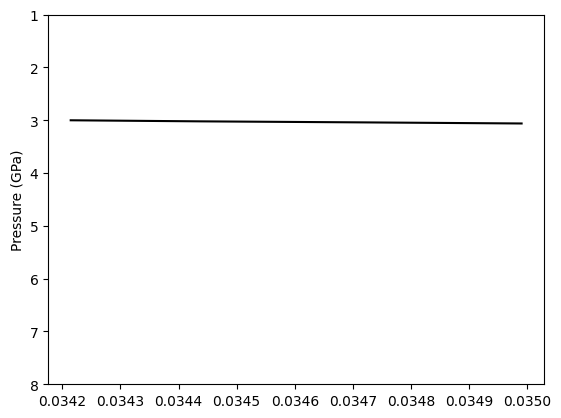

In [76]:
f, a = plt.subplots(1,1)
a.plot(delta56Fe_offset['liq'], Results['Conditions']['P_kbar']/10, '-k')
a.set_ylim([8, 1])
a.set_ylabel('Pressure (GPa)')

In [77]:
Results['Mass']

,ol,g,opx,cpx,liq
0,0.615203,0.151866,0.075035,0.157870,0.000000
1,0.615204,0.151617,0.074877,0.158276,0.000000
2,0.615205,0.151363,0.074721,0.158686,0.000000
3,0.615210,0.151106,0.074564,0.159101,0.000000
4,0.615211,0.150843,0.074410,0.159517,0.000000
...,...,...,...,...,...
95,0.615443,0.083959,0.082192,0.218378,0.000000
96,0.615316,0.082106,0.083523,0.218546,0.000483
97,0.614781,0.079889,0.086844,0.216039,0.002424
98,0.614179,0.077558,0.090407,0.213228,0.004601


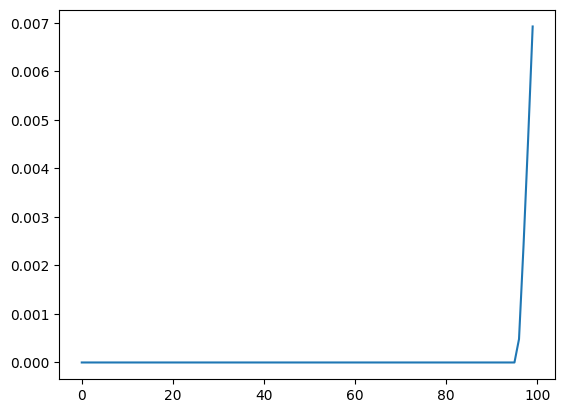

In [78]:
f, a = plt.subplots(1,1)
a.plot(Results["liq_prop"]["Mass"])

In [7]:
# import julia
# julia.install()

Text(0, 0.5, 'Pressure (GPa)')

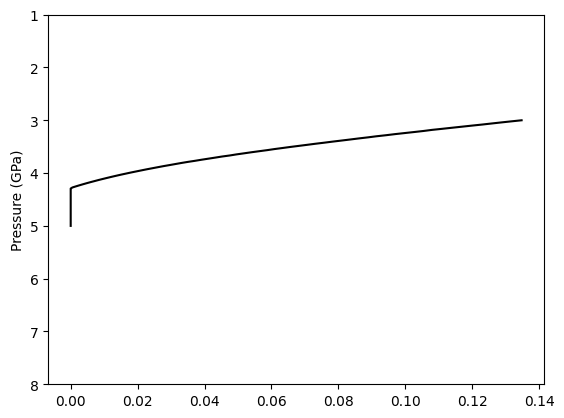

In [66]:
f, a = plt.subplots(1,1)
a.plot(Results['liq_prop']['Mass'], Results['Conditions']['P_kbar']/10, '-k')
a.set_ylim([8, 1])
a.set_ylabel('Pressure (GPa)')

Text(0, 0.5, 'Pressure (GPa)')

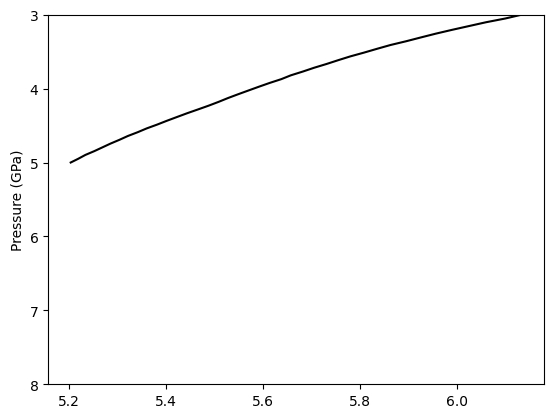

In [55]:
f, a = plt.subplots(1,1)
a.plot(Results['cpx']['FeO'], Results['Conditions']['P_kbar']/10, '-k')
a.set_ylim([8, 3])
a.set_ylabel('Pressure (GPa)')

In [17]:
Results['cpx']['FeO']

0      0.035510
1      0.035555
2      0.035605
3      0.035651
4      0.035697
         ...   
245    0.000000
246    0.000000
247    0.000000
248    0.000000
249    0.000000
Name: FeO, Length: 250, dtype: float64

KeyError: 'Entropy'

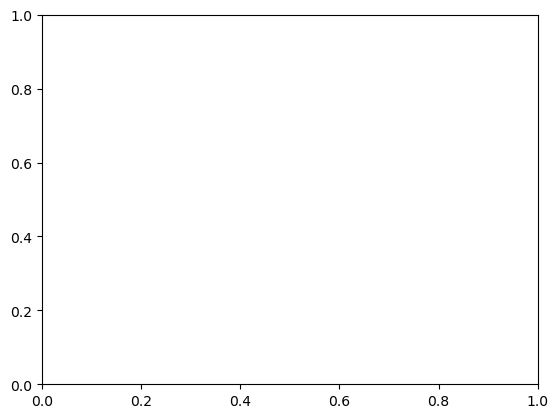

In [11]:
f, a = plt.subplots(1,1)
a.plot(Results['Conditions']['Entropy'], Results['Conditions']['pressure']/10000, '-k')
a.set_ylim([4, 0])
a.set_ylabel('Pressure (GPa)')